[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/obss/sahi/blob/main/demo/inference_for_huggingface.ipynb)

## 0. Preperation

- Install latest version of SAHI and Huggingface transformers:

In [1]:
!pip install -U sahi
!pip install transformers timm

In [1]:
import os
os.getcwd()

'/home/mandip/Github/sahi/demo'

- Import required modules:

In [2]:
# import required functions, classes
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction, predict, get_prediction
from sahi.utils.file import download_from_url
from sahi.utils.cv import read_image
from IPython.display import Image

You can see object detection models available at [HF model hub](https://huggingface.co/models?pipeline_tag=object-detection&sort=downloads).

In [4]:
# Select a model to use, we use a DETR model.
model_path = "facebook/detr-resnet-50"

# download test images into demo_data folder
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

## 1. Standard Inference with a Huggingface Model

- Instantiate a detection model by defining model weight path, confing path and other parameters:

In [5]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='huggingface',
    model_path=model_path,
    config_path=model_path,
    confidence_threshold=0.33,
    image_size=640,
    device="cpu", # or 'cuda'
)

/home/mandip/Github/sahi/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
04/30/2024 09:29:42 - INFO - timm.models._builder -   Loading pretrained weights from Hugging Face hub (timm/resnet50.a1_in1k)
04/30/2024 09:29:42 - INFO - timm.models._hub -   [timm/resnet50.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
04/30/2024 09:29:44 - INFO - timm.models._builder -   Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.d

- Perform prediction by feeding the get_prediction function with an image path and a DetectionModel instance:

In [12]:
result = get_prediction("demo_data/M6 377 2A J33.jpeg", detection_model)

- Or perform prediction by feeding the get_prediction function with a numpy image and a DetectionModel instance:

In [28]:
#result = get_prediction(read_image("demo_data/M6 377 2A J33.jpeg"), detection_model)

- Visualize predicted bounding boxes and masks over the original image:

33


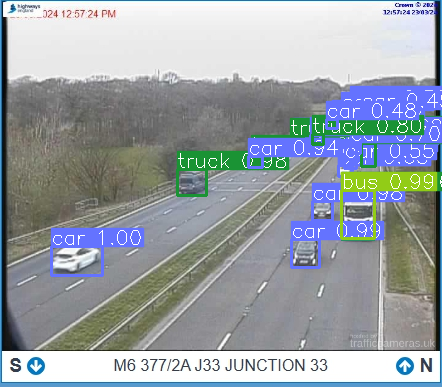

In [7]:
result.export_visuals(export_dir="demo_data/")
print(result.object_prediction_list.__len__())

Image("demo_data/prediction_visual.png")

## 2. Sliced Inference with a Huggingface Model

- To perform sliced prediction we need to specify slice parameters. In this example we will perform prediction over slices of 512x512 with an overlap ratio of 0.2:

In [8]:
result = get_sliced_prediction(
    "demo_data/M6 377 2A J33.jpeg",
    detection_model,
    slice_height = 200,
    slice_width = 200,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
)

Performing prediction on 9 slices.


- Visualize predicted bounding boxes and masks over the original image:

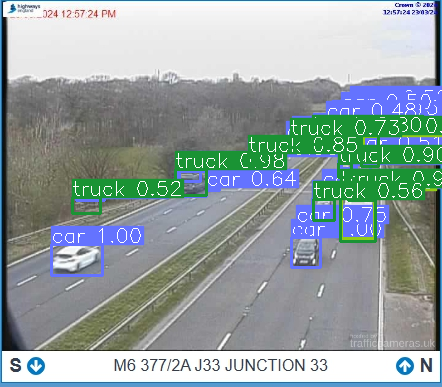

In [9]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

## 3. Prediction Result

- Predictions are returned as [sahi.prediction.PredictionResult](sahi/prediction.py), you can access the object prediction list as:

In [10]:
object_prediction_list = result.object_prediction_list

In [11]:
print(object_prediction_list.__len__())
object_prediction_list[:3]

42


[ObjectPrediction<
     bbox: BoundingBox: <(51, 244, 102, 275), w: 51, h: 31>,
     mask: None,
     score: PredictionScore: <value: 0.9987117052078247>,
     category: Category: <id: 3, name: car>>,
 ObjectPrediction<
     bbox: BoundingBox: <(291, 237, 320, 267), w: 29, h: 30>,
     mask: None,
     score: PredictionScore: <value: 0.9977758526802063>,
     category: Category: <id: 3, name: car>>,
 ObjectPrediction<
     bbox: BoundingBox: <(312, 198, 334, 220), w: 22, h: 22>,
     mask: None,
     score: PredictionScore: <value: 0.9957626461982727>,
     category: Category: <id: 3, name: car>>]

In [13]:
result.to_coco_annotations()[:20]

[{'image_id': None,
  'bbox': [51.0, 244.0, 51.0, 31.0],
  'score': 0.9987117052078247,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1581},
 {'image_id': None,
  'bbox': [291.0, 237.0, 29.0, 30.0],
  'score': 0.9977758526802063,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 870},
 {'image_id': None,
  'bbox': [312.0, 198.0, 22.0, 22.0],
  'score': 0.9957626461982727,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 484},
 {'image_id': None,
  'bbox': [248.0, 156.0, 14.0, 11.0],
  'score': 0.9849525094032288,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 154},
 {'image_id': None,
  'bbox': [176.0, 171.0, 30.0, 25.0],
  'score': 0.982546865940094,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 750},
 {'image_id': None,
  'bbox': [338.0, 160.0, 14.0, 17.0]

- ObjectPrediction's can be converted to [COCO prediction](https://github.com/i008/COCO-dataset-explorer) format:

In [14]:
result.to_coco_predictions(image_id=1)[:3]

[{'image_id': 1,
  'bbox': [51.0, 244.0, 51.0, 31.0],
  'score': 0.9987117052078247,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 1581},
 {'image_id': 1,
  'bbox': [291.0, 237.0, 29.0, 30.0],
  'score': 0.9977758526802063,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 870},
 {'image_id': 1,
  'bbox': [312.0, 198.0, 22.0, 22.0],
  'score': 0.9957626461982727,
  'category_id': 3,
  'category_name': 'car',
  'segmentation': [],
  'iscrowd': 0,
  'area': 484}]

- ObjectPrediction's can be converted to [imantics](https://github.com/jsbroks/imantics) annotation format:

In [15]:
!pip install -U imantics

In [16]:
result.to_imantics_annotations()[:3]

## 4. Batch Prediction

- Set model and directory parameters:

In [17]:
model_type = "huggingface"
model_path = model_path
model_config_path = model_path
model_device = "cpu # or 'cuda:0'
model_confidence_threshold = 0.5

slice_height = 512
slice_width = 512
overlap_height_ratio = 0.2
overlap_width_ratio = 0.2

source_image_dir = "demo_data/"

SyntaxError: unterminated string literal (detected at line 4) (1729670620.py, line 4)

- Perform sliced inference on given folder:

In [ ]:
predict(
    model_type=model_type,
    model_path=model_path,
    model_config_path=model_path,
    model_device=model_device,
    model_confidence_threshold=model_confidence_threshold,
    source=source_image_dir,
    slice_height=slice_height,
    slice_width=slice_width,
    overlap_height_ratio=overlap_height_ratio,
    overlap_width_ratio=overlap_width_ratio,
)

There are 3 listed files in folder: demo_data/


09/27/2022 17:36:53 - INFO - timm.models.helpers -   Loading pretrained weights from url (https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50_ram-a26f946b.pth)
Performing inference on images:   0%|          | 0/3 [00:00<?, ?it/s]

Performing prediction on 6 number of slices.


Performing inference on images:  33%|███▎      | 1/3 [00:01<00:02,  1.21s/it]

Prediction time is: 1165.46 ms
Performing prediction on 6 number of slices.


Performing inference on images:  67%|██████▋   | 2/3 [00:01<00:00,  1.08it/s]

Prediction time is: 686.24 ms
Performing prediction on 6 number of slices.


Performing inference on images: 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

Prediction time is: 807.90 ms
Prediction results are successfully exported to runs/predict/exp17
